In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
import sklearn.preprocessing as preprocessing
import csv  

#import os
#os.getcwd() #显示当前目录
df = pd.read_csv("./data/train_sample.csv")
df #显示

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [2]:
    #时间转换
    df['click_time'] = pd.to_datetime(df['click_time'])
    year = [i.year for i in df['click_time']]
    month = [i.month for i in df['click_time']]
    day = [i.day for i in df['click_time']]
    hour = [i.hour for i in df['click_time']]
    minute = [i.minute for i in df['click_time']]
    time = pd.DataFrame({'year':year, 'month':month, 'day':day,'hour':hour,'minute':minute})   
    df = pd.concat([df, time], axis=1) #加入到数据中

    # 用preprocessing模块做scaling
    scaler = preprocessing.StandardScaler()
    #df.fillna(0.0, inplace = True)  #填充所有缺失数据
    #df.ip = df.ip.fillna(value=0.0)
    scale_param = scaler.fit(df['ip'].values.reshape(-1, 1))
    df['ip_scaled'] = scaler.fit_transform(df['ip'].values.reshape(-1, 1), scale_param)

    scale_param = scaler.fit(df['app'].values.reshape(-1,1))
    df['app_scaled'] = scaler.fit_transform(df['app'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['device'].values.reshape(-1,1))
    df['device_scaled'] = scaler.fit_transform(df['device'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['os'].values.reshape(-1,1))
    df['os_scaled'] = scaler.fit_transform(df['os'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['channel'].values.reshape(-1,1))
    df['channel_scaled'] = scaler.fit_transform(df['channel'].values.reshape(-1,1), scale_param) 
    
    scale_param = scaler.fit(df['year'].values.reshape(-1,1))
    df['year_scaled'] = scaler.fit_transform(df['year'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['month'].values.reshape(-1,1))
    df['month_scaled'] = scaler.fit_transform(df['month'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['day'].values.reshape(-1,1))
    df['day_scaled'] = scaler.fit_transform(df['day'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['hour'].values.reshape(-1,1))
    df['hour_scaled'] = scaler.fit_transform(df['hour'].values.reshape(-1,1), scale_param) 

    scale_param = scaler.fit(df['minute'].values.reshape(-1,1))
    df['minute_scaled'] = scaler.fit_transform(df['minute'].values.reshape(-1,1), scale_param) 
    
    df

/Users/herb/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_scaled,app_scaled,device_scaled,os_scaled,channel_scaled,year_scaled,month_scaled,day_scaled,hour_scaled,minute_scaled
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,7,9,...,-0.053209,-0.003205,-0.079992,-0.175506,1.758875,0.0,0.0,-0.968736,-0.053165,0.048625
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,7,13,...,0.204827,0.866860,-0.079992,-0.104004,-0.075795,0.0,0.0,-0.968736,0.594026,0.624345
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,7,18,...,0.145602,-0.003205,-0.079992,-0.068253,-0.438104,0.0,0.0,-0.968736,1.403015,-1.390673
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,7,4,...,0.047657,0.063724,-0.079992,-0.175506,1.604701,0.0,0.0,-0.968736,-0.862154,1.660640
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,9,...,-0.327097,-0.003205,-0.079992,-0.390010,-0.700200,0.0,0.0,1.280320,-0.053165,-1.678533
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0,9,1,...,0.034469,-0.605557,-0.079992,-0.104004,-1.185848,0.0,0.0,1.280320,-1.347547,-0.411950
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0,9,1,...,-1.062457,-0.739413,-0.079992,-0.104004,-1.031674,0.0,0.0,1.280320,-1.347547,-0.699810
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0,7,10,...,0.433150,-0.203989,-0.079992,0.038999,1.334896,0.0,0.0,-0.968736,0.108633,-1.620961
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0,8,9,...,1.456445,-0.672485,-0.076141,-0.014627,0.733618,0.0,0.0,0.155792,-0.053165,0.336485
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0,8,12,...,0.750053,-0.605557,-0.079992,-0.068253,-1.031674,0.0,0.0,0.155792,0.432228,0.336485


In [2]:
data_train.info() #从下面可以看出属性的数据不全

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [3]:
data_train.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


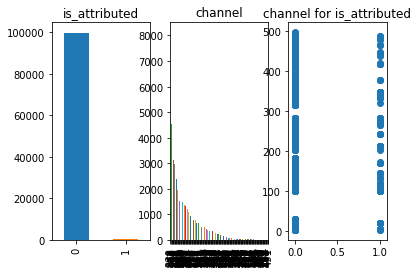

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((1,3),(0,0))             # 在一张大图里分列几个小图
data_train.is_attributed.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"is_attributed") # 标题
#plt.ylabel(u"人数") 

plt.subplot2grid((1,3),(0,1))
data_train.channel.value_counts().plot(kind="bar")
#plt.ylabel(u"人数")
plt.title(u"channel")

plt.subplot2grid((1,3),(0,2))
plt.scatter(data_train.is_attributed, data_train.channel)
#plt.ylabel(u"年龄")                         # 设定纵坐标名称
#plt.grid(b=True, which='major', axis='y') 
plt.title(u"channel for is_attributed")

'''
plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"density") 
plt.title(u"")#各等级的乘客年龄分布
plt.legend((u'one', u'two',u'three'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"")#各登船口岸上船人数
#plt.ylabel(u"人数")  
'''
plt.show()

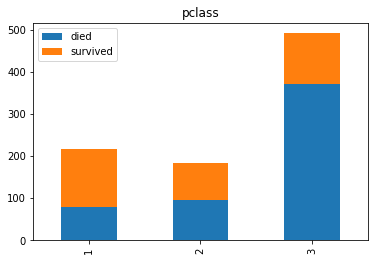

In [5]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'died':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"pclass")#各乘客等级的获救情况
#plt.xlabel(u"乘客等级") 
#plt.ylabel(u"人数") 
plt.show()

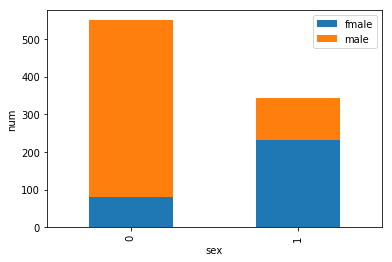

In [6]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'male':Survived_m, u'fmale':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"")#按性别看获救情况
plt.xlabel(u"sex") 
plt.ylabel(u"num")
plt.show()

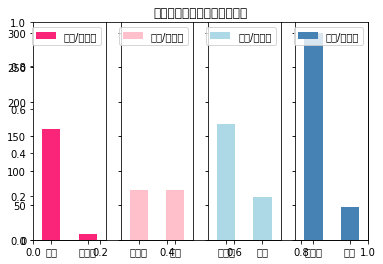

In [7]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

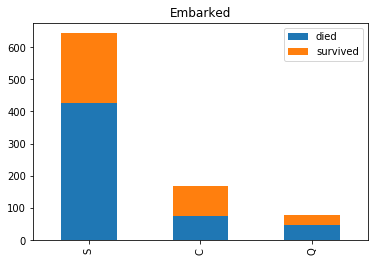

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'survived':Survived_1, u'died':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Embarked")
#plt.xlabel(u"登录港口") 
#plt.ylabel(u"人数") 

plt.show()

In [9]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print (df)
#无明显区别

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


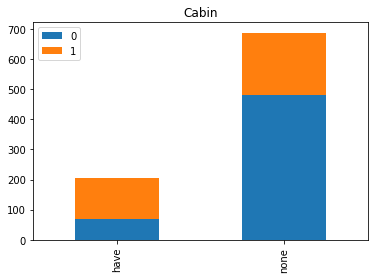

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'have':Survived_cabin, u'none':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"Cabin")#按Cabin有无看获救情况
#plt.xlabel(u"Cabin有无") 
#plt.ylabel(u"人数")
plt.show()

In [11]:
    df = data_train
    def set_Cabin_type(df):
        df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
        df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
        return df
    df = set_Cabin_type(df) #将船仓类型变为——有 无
    df.fillna(0.0, inplace = True)  #填充所有缺失数据
    df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,No,C


In [12]:
    dummies_Cabin = pd.get_dummies(df['Cabin'], prefix= 'Cabin')
    dummies_Embarked = pd.get_dummies(df['Embarked'], prefix= 'Embarked')
    dummies_Sex = pd.get_dummies(df['Sex'], prefix= 'Sex')
    dummies_Pclass = pd.get_dummies(df['Pclass'], prefix= 'Pclass')

    df = pd.concat([df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
    df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
    df
    np.isnan(df).any()

PassengerId     False
Survived        False
Age             False
SibSp           False
Parch           False
Fare            False
Cabin_No        False
Cabin_Yes       False
Embarked_0.0    False
Embarked_C      False
Embarked_Q      False
Embarked_S      False
Sex_female      False
Sex_male        False
Pclass_1        False
Pclass_2        False
Pclass_3        False
dtype: bool

In [14]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)  
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_0.0,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,0,1,0,1,0,0,1,-0.102313,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,0,1,0,0,1,0,1,0,0,0.807492,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,0,1,1,0,0,0,1,0.125138,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,0,1,1,0,1,0,0,0.636903,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,0,1,0,1,0,0,1,0.636903,-0.486337
5,6,0,0.0,0,0,8.4583,1,0,0,0,1,0,0,1,0,0,1,-1.353294,-0.478116
6,7,0,54.0,0,0,51.8625,0,1,0,0,0,1,0,1,1,0,0,1.717296,0.395814
7,8,0,2.0,3,1,21.0750,1,0,0,0,0,1,0,1,0,0,1,-1.239568,-0.224083
8,9,1,27.0,0,2,11.1333,1,0,0,0,0,1,1,0,0,0,1,0.182001,-0.424256
9,10,1,14.0,1,0,30.0708,1,0,0,1,0,0,1,0,0,1,0,-0.557215,-0.042956


In [16]:
    train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
    train_np = train_df.as_matrix()
    train_np

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.10231279, -0.50244517],
       [ 1.        ,  1.        ,  0.        , ...,  0.        ,
         0.80749164,  0.78684529],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.12513832, -0.48885426],
       ..., 
       [ 0.        ,  1.        ,  2.        , ...,  1.        ,
        -1.35329389, -0.17626324],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12513832, -0.04438104],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.46631498, -0.49237783]])

In [17]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)